<a href="https://colab.research.google.com/github/JorgeZarama/Supervisado/blob/main/Programa12_Regresion_OLS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from math import sqrt
from pprint import pprint
from sklearn import datasets, linear_model, metrics
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_validate, KFold, cross_val_predict, train_test_split, cross_val_score
from sklearn import preprocessing
from sklearn.metrics import make_scorer, mean_squared_error
import matplotlib.pyplot as plt

In [5]:
# Carga de datos.
# datos = datasets.load_boston()
datos = datasets.fetch_california_housing()
X = datos.data
y = datos.target
print('Dimensiones de X: ', np.shape(X))
print(y)
#pprint(datos)

Dimensiones de X:  (20640, 8)
[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [6]:
# # Métricas de evaluación.
metricas = {
  'MAE':  'neg_mean_absolute_error',
  'RMSE': make_scorer(lambda y, y_pred:
                      sqrt(metrics.mean_squared_error(y, y_pred)),
                      greater_is_better=False),
  'MAPE': make_scorer(lambda y, y_pred:
                      np.mean(np.abs((y - y_pred) / y)) * 100,
                      greater_is_better=False),
  'R2':   'r2',}

In [7]:
# 1) Partición de datos externa
X_training, X_testing, y_training, y_testing = train_test_split(X, y, test_size=0.2, random_state=42)
print(np.shape(X_training))
print(np.shape(X_testing))

(16512, 8)
(4128, 8)


In [9]:
# 2) Extracción de características
# 3) Estandarización de los datos de entrenamiento
standardizer = preprocessing.StandardScaler()
X_stdr = standardizer.fit_transform(X_training)

In [10]:
# 4) Selección de atributos

In [11]:
# 5) Construcción del algoritmo de aprendizaje.
reg = linear_model.LinearRegression(fit_intercept=True)

In [12]:
# 5.1) Validación cruzada interna

# Extraer directamente resultados del error para cada bolsa, en lugar de las predicciones
cross_val_results = cross_validate(reg, X_stdr, y_training,
                                    cv = KFold(n_splits=5, shuffle=True, random_state=42), scoring=metricas)
# print("cross_val_R2:   %0.4f +/- %0.4f" % (-cross_val_results.mean(), cross_val_results.std()))
pprint(cross_val_results)

{'fit_time': array([0.03631473, 0.02782035, 0.02683854, 0.02483296, 0.02062011]),
 'score_time': array([0.00739741, 0.00197411, 0.00493169, 0.00510073, 0.00415444]),
 'test_MAE': array([-0.54071407, -0.52878981, -0.51274193, -0.53512422, -0.52793364]),
 'test_MAPE': array([-31.74769388, -31.65516613, -30.97054077, -32.61432353,
       -30.685065  ]),
 'test_R2': array([0.60970239, 0.60411343, 0.6354319 , 0.60076148, 0.60727452]),
 'test_RMSE': array([-0.73389779, -0.72516701, -0.69726867, -0.73337185, -0.71284225])}


In [13]:
# 5.2) Entrenamiento con todos los datos para obtener los coeficientes del modelo.
model = reg.fit(X_stdr, y_training)

# Obtención de los coeficientes del modelo.
w = model.coef_
print('Model coeficients: \n', w)

# Obtención del término independiente del modelo.
w_0 = model.intercept_
print('\nTérmino independiente: ', w_0)

Model coeficients: 
 [ 0.85438303  0.12254624 -0.29441013  0.33925949 -0.00230772 -0.0408291
 -0.89692888 -0.86984178]

Término independiente:  2.071946937378619


In [ ]:
# ---- PREDICCIÓN ---- #

In [14]:
# 6) Extracción de las características de test
# 7) Estandarización de las característiacs de test
X_test_stdr = standardizer.transform(X_testing)

In [15]:
# 8) Selección de los atributos de test

In [16]:
# 9) Predicción del conjunto de test
y_pred_test = model.predict(X_test_stdr)

In [17]:
# 10) Cálculo de las métricas de evaluación.
MAE = metrics.mean_absolute_error(y_testing, y_pred_test)
MSE = metrics.mean_squared_error(y_testing, y_pred_test, squared=True)
RMSE = metrics.mean_squared_error(y_testing, y_pred_test, squared=False)
R2 = metrics.r2_score(y_testing, y_pred_test)

print('MAE:  %.4f' % MAE)
print('MSE: %.4f' % MSE)
print('RMSE: %.4f' % RMSE)
print('R2:   %.4f' % R2)

MAE:  0.5332
MSE: 0.5559
RMSE: 0.7456
R2:   0.5758


In [18]:
# Get regression graphics
def report_regression_graphics(y_true, y_pred):
    fig, ax = plt.subplots(2,1)

    # Plot linear fit
    ax[0].scatter(y_true, y_pred)
    ax[0].set_ylabel('y_pred')
    ax[0].set_title('Regression line')
    ax[0].grid()
    # overlay the regression line
    z = np.polyfit(np.float64(y_true), y_pred, 1)
    p = np.poly1d(z)
    ax[0].plot(y_true, p(y_true), color='magenta')

    # Plot bisectriz
    ax[1].scatter(y_true, y_pred, edgecolors=(0, 0, 0))
    ax[1].set_xlabel('y_true')
    ax[1].set_ylabel('y_pred')
    ax[1].set_title('Bisector')
    ax[1].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=4)
    ax[1].grid()

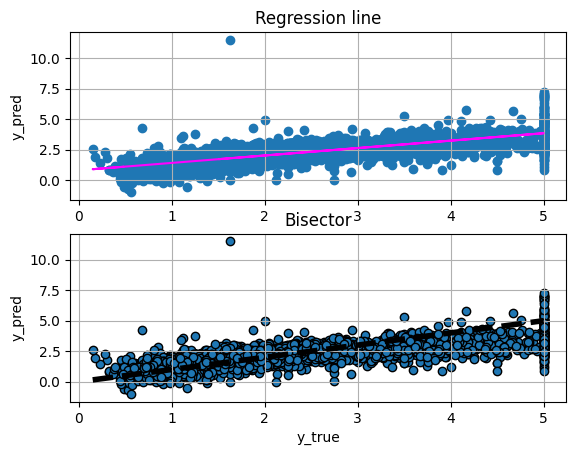

In [19]:
# Extraemos los resultados cualitativos del problema de regresión
report_regression_graphics(y_testing, y_pred_test)

In [ ]:
# Información sobre los algoritmos Ridge, Lasso y Elasticnet
# https://towardsdatascience.com/whats-the-difference-between-linear-regression-lasso-ridge-and-elasticnet-8f997c60cf29